#**Random Forest**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%load_ext rpy2.ipython

In [3]:
#%%R
#install.packages("dplyr") 
#install.packages("ggplot2") 
#install.packages("caret") 
#install.packages("e1071") 
#install.packages("cowplot") 
#install.packages("matrix")
#install.packages("magrittr")
#install.packages("glmnet", dependencies=TRUE)
#install.packages("groupdata2")
#install.packages("randomForest")
#tar("libraryrf.tar.gz", "/usr/local/lib/R/site-library")

In [4]:
#%cp libraryrf.tar.gz gdrive/MyDrive

In [5]:
%cp gdrive/MyDrive/libraryrf.tar.gz .

In [6]:
!tar xf libraryrf.tar.gz

tar: Removing leading `/' from member names


In [7]:
%%R
.libPaths('usr/local/lib/R/site-library/')
install.packages("caTools")

R[write to console]: Installing package into ‘/content/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caTools_1.18.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 64960 bytes (63 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =

In [8]:
%%R
library(data.table) 
library(ggplot2)  
library(caret)        
library(e1071)      
library(cowplot)    
library(Matrix)
library(magrittr)
library(glmnet)
library(groupdata2)
library(class)
library(randomForest)
library(caTools)

R[write to console]: data.table 1.14.2 using 1 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: Loading required package: lattice

R[write to console]: Loaded glmnet 4.1-3

R[write to console]: randomForest 4.6-14

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: ‘randomForest’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    margin




In [9]:
%%R
data = read.csv("/content/gdrive/MyDrive/DS_CP/diabetes.csv")

In [10]:
%%R
colnames(data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 


In [11]:
%%R
dim(data)

[1] 768   9


In [12]:
%%R
sapply(data, function(x) sum(is.na(x)))

             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [13]:
%%R
data$Outcome <- as.factor(data$Outcome)
table(data$Outcome)


  0   1 
500 268 


In [14]:
%%R
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outcome
 0:5

In [15]:
%%R
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : Factor w/ 2 levels "0","1": 2 1 2 1 2 1 2 1 2 2 ...


In [16]:
%%R
data<-upsample(
  data,
  cat_col= "Outcome",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)

In [17]:
%%R
set.seed(222)
ind <- sample(2, nrow(data), replace = TRUE,prob = c(0.8,0.2))
train <- data[ind==1,]
test <- data[ind==2,]

In [18]:
%%R
set.seed(122)
rf <- randomForest(Outcome~., data = train,
                   ntree = 550, 
                   mtry = 8,
                   importance = TRUE,
                   proximity = TRUE)

In [19]:
%%R
p1 <- predict(rf,train)
confusionMatrix(p1, train$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 413   0
         1   0 404
                                     
               Accuracy : 1          
                 95% CI : (0.9955, 1)
    No Information Rate : 0.5055     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5055     
         Detection Rate : 0.5055     
   Detection Prevalence : 0.5055     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     


In [20]:
%%R
p2 <- predict(rf,test)
confusionMatrix(p2,test$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 72  1
         1 15 95
                                          
               Accuracy : 0.9126          
                 95% CI : (0.8619, 0.9492)
    No Information Rate : 0.5246          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8234          
                                          
 Mcnemar's Test P-Value : 0.001154        
                                          
            Sensitivity : 0.8276          
            Specificity : 0.9896          
         Pos Pred Value : 0.9863          
         Neg Pred Value : 0.8636          
             Prevalence : 0.4754          
         Detection Rate : 0.3934          
   Detection Prevalence : 0.3989          
      Balanced Accuracy : 0.9086          
                                          
       'Positive' Class : 0               
                                    

In [21]:
%%R
install.packages("pROC")
library(pROC)

R[write to console]: Installing package into ‘/content/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pROC_1.18.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 688430 bytes (672 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


In [22]:
%%R
test$Outcome<-as.numeric(test$Outcome)
p2<-as.numeric(p2)
roc_rf<- roc(test$Outcome, p2)
roc_rf

R[write to console]: Setting levels: control = 1, case = 2

R[write to console]: Setting direction: controls < cases




Call:
roc.default(response = test$Outcome, predictor = p2)

Data: p2 in 87 controls (test$Outcome 1) < 96 cases (test$Outcome 2).
Area under the curve: 0.9086


             [,1]
1 vs. 2 0.9085848


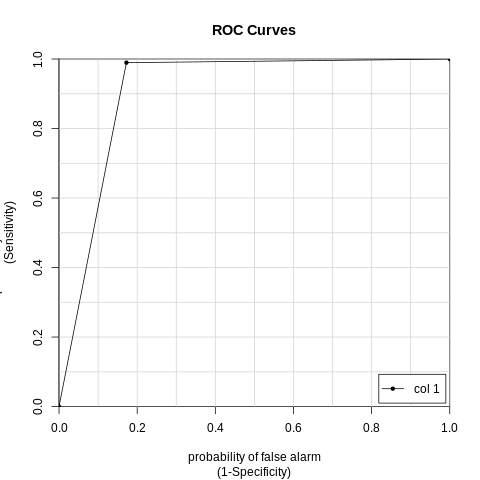

In [23]:
%%R
caTools::colAUC(p2, test$Outcome, plotROC = T)

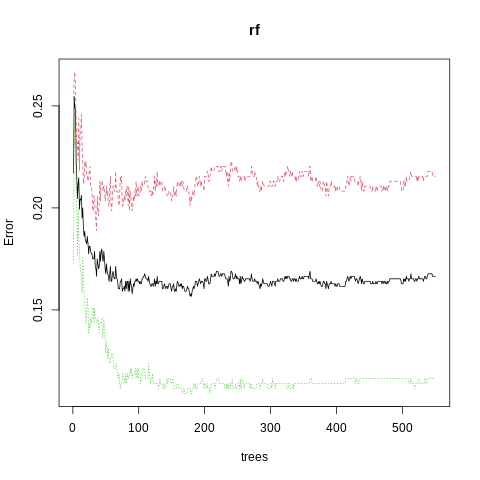

In [24]:
%%R
plot(rf)

mtry = 2  OOB error = 16.16% 
Searching left ...
mtry = 1 	OOB error = 16.16% 
0 3 
Searching right ...
mtry = 8 	OOB error = 16.52% 
-0.02272727 3 


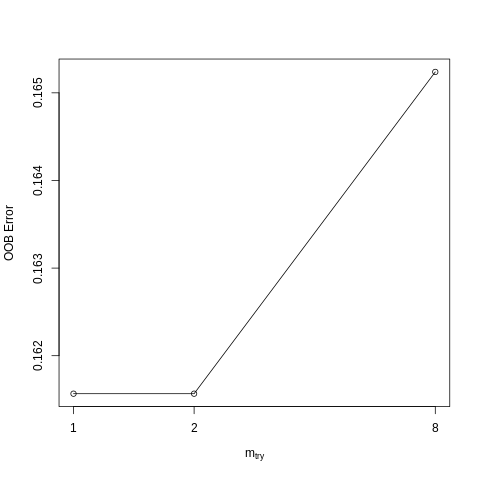

In [25]:
%%R
t <- tuneRF(train[,-9], train[,9],
            stepFactor = 6,
            plot = TRUE,
            ntreeTry = 550,
            trace = TRUE,
            improve = 3)